# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [2]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

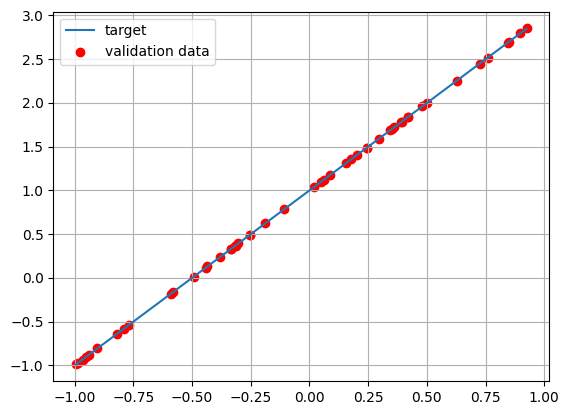

In [3]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [2]:
# compose the NN model
import os
import tensorflow as tf
from tensorflow import keras

#removing GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [8]:
# get a summary of our composed model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [9]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train,
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.6548 - mse: 4.6548 - val_loss: 3.3233 - val_mse: 3.3233
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5182 - mse: 3.5182 - val_loss: 2.5682 - val_mse: 2.5682
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5446 - mse: 2.5446 - val_loss: 2.0169 - val_mse: 2.0169
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1945 - mse: 2.1945 - val_loss: 1.5954 - val_mse: 1.5954
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6932 - mse: 1.6932 - val_loss: 1.2729 - val_mse: 1.2729
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3198 - mse: 1.3198 - val_loss: 1.0187 - val_mse: 1.0187
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0674 - mse: 1.0674 - val_loss: 0.8171 - val_mse: 0.8171
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8627 - mse: 0.8627 - val_loss: 0.6563 - val_mse: 0.6563
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6878 - mse:

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [10]:
# return weights and biases
model.get_weights()

[array([[1.8703758]], dtype=float32), array([0.9985569], dtype=float32)]

In [11]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - mse: 0.0052 

Test loss: 0.005342368967831135
Test accuracy: 0.005342368967831135


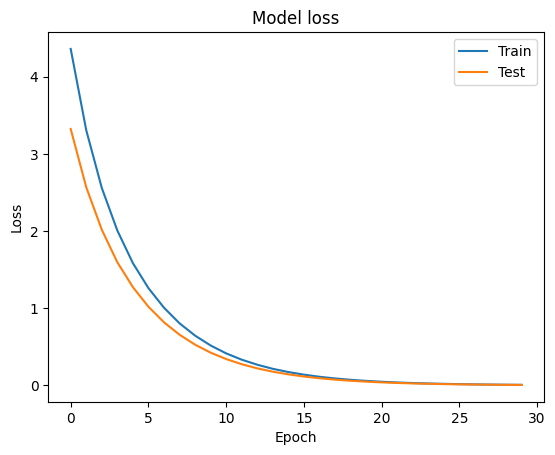

In [12]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


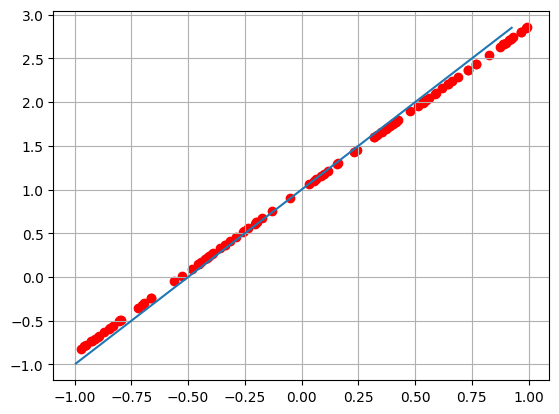

In [13]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

# <span style="color:purple"> Solution Exercise 11.1</span>

### Problems Theory
- Neural networks consist of neurons arranged in layers, with each neuron depending on certain weights. During model training, these weights are adjusted to optimize the network's output. The parameters updated during training are known as the **model parameters**. However, there is also a set of parameters that must be selected before training begins, such as the number of epochs $ N_{\text{epochs}} $, the number of data points $ N_{\text{train}} $, and the value of $ \sigma $. These are known as **hyperparameters**.

### Problems approach
- In this problem is required to understand how the model depends on three hyperparameters. To do so I changed one hiperparameters per simulation a studied how the loss changed. In reality one should change all the hiperparameters set because they are not independent variables, but in this case where the problem is simple, is fine to have an idea of how the problems respond to the hiperparameters.




In [3]:
'''
#Import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect
#vector to save the different results
epochs=np.arange(0,101,2)
trains=np.arange(50,551,10)
sigmas=np.arange(0.0,5.01,0.1)
epoch_accuracy = np.empty((0,))
epoch_loss = np.empty((0,))
sigma_accuracy = np.empty((0,))
sigma_loss = np.empty((0,))
train_accuracy = np.empty((0,))
train_loss = np.empty((0,))
# generate training inputs
for epoch in epochs:
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, 500)
    x_valid = np.random.uniform(-1, 1, 50)
    x_valid.sort()
    y_target = m * x_valid + b # ideal (target) linear function

    sigma = 0.0 # noise standard deviation, for the moment it is absent
    y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(m * x_valid + b, sigma)
    #Create the model
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))
    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=epoch, shuffle=True, validation_data=(x_valid, y_valid),verbose=0)
    # evaluate model
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
    # Append to arrays
    epoch_loss = np.append(epoch_loss, score[0])
    epoch_accuracy = np.append(epoch_accuracy, score[1])

for sigma in sigmas:
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, 500)
    x_valid = np.random.uniform(-1, 1, 50)
    x_valid.sort()
    y_target = m * x_valid + b # ideal (target) linear function

    y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(m * x_valid + b, sigma)
    #Create the model
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))
    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid),verbose=0)
    # evaluate model
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
    # Append to arrays
    sigma_loss = np.append(sigma_loss, score[0])
    sigma_accuracy = np.append(sigma_accuracy, score[1])

for train in trains:
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, train)
    x_valid = np.random.uniform(-1, 1, 50)
    x_valid.sort()
    y_target = m * x_valid + b # ideal (target) linear function

    sigma = 0.0 # noise standard deviation, for the moment it is absent
    y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(m * x_valid + b, sigma)
    #Create the model
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))
    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid),verbose=0)
    # evaluate model
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
    # Append to arrays
    train_loss = np.append(train_loss, score[0])
    train_accuracy = np.append(train_accuracy, score[1])

merged_loss=np.array([epoch_loss,sigma_loss,train_loss])
merged_accuracy=np.array([epoch_accuracy,sigma_accuracy,train_accuracy])
np.savetxt('../lecture_11/Results/merged_losses.txt',merged_loss)
'''

"\n#Import libraries\nimport numpy as np\nimport tensorflow as tf\nimport matplotlib.pyplot as plt\nfrom tensorflow import keras\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, Activation\nfrom tensorflow.keras import backend as K\nfrom tensorflow.keras.utils import get_custom_objects\n\n# target parameters of f(x) = m*x + b\nm = 2 # slope\nb = 1 # intersect\n#vector to save the different results\nepochs=np.arange(0,101,2)\ntrains=np.arange(50,551,10)\nsigmas=np.arange(0.0,5.01,0.1)\nepoch_accuracy = np.empty((0,))\nepoch_loss = np.empty((0,))\nsigma_accuracy = np.empty((0,))\nsigma_loss = np.empty((0,))\ntrain_accuracy = np.empty((0,))\ntrain_loss = np.empty((0,))\n# generate training inputs\nfor epoch in epochs:\n    np.random.seed(0)\n    x_train = np.random.uniform(-1, 1, 500)\n    x_valid = np.random.uniform(-1, 1, 50)\n    x_valid.sort()\n    y_target = m * x_valid + b # ideal (target) linear function\n\n    sigma = 0.0 # noise standard

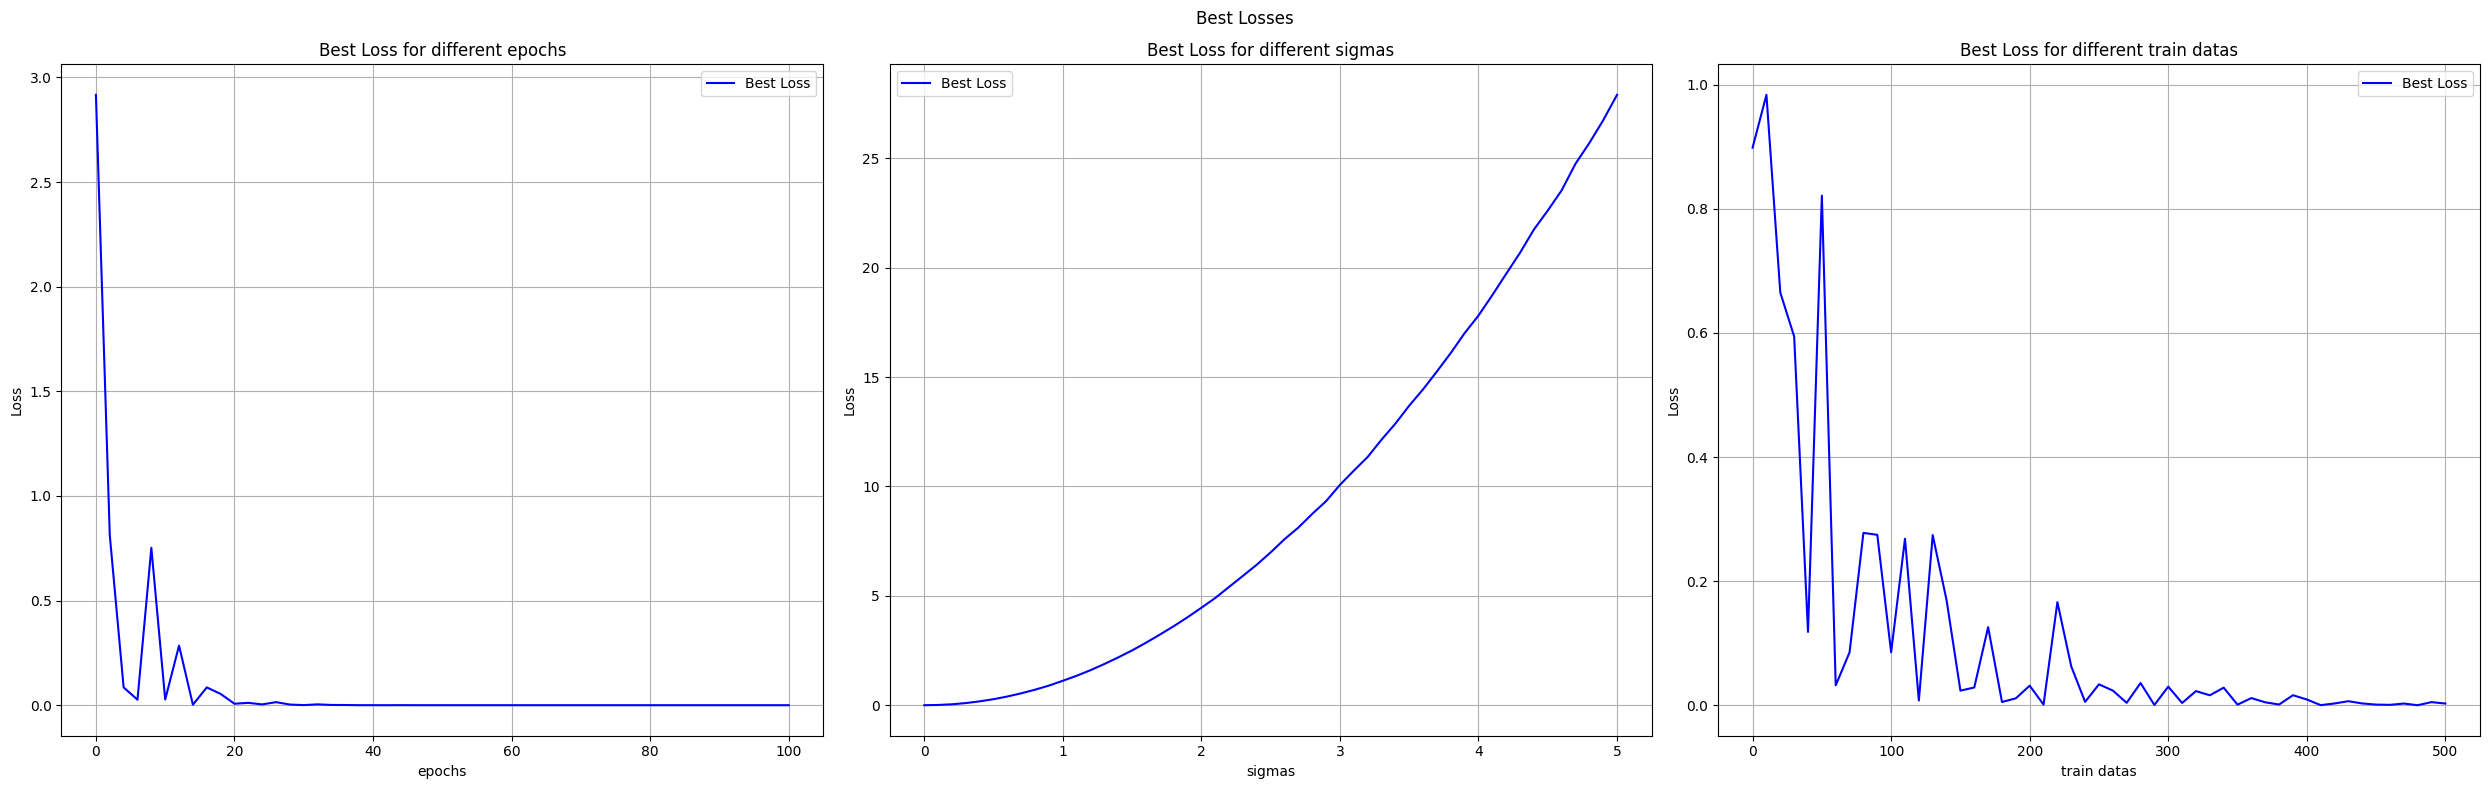

In [4]:
#plot the results
merged_loss=np.loadtxt('../lecture_11/Results/merged_losses.txt')
fig, axs = plt.subplots(1,3,figsize=(25,8),)
fig.suptitle("Best Losses")
strings=['epochs','sigmas','train datas']
epochs=np.arange(0,101,2)
trains=np.arange(0,501,10)
sigmas=np.arange(0.0,5.01,0.1)
x_values=[epochs,sigmas,trains]
for i,string,x in zip(range(3),strings,x_values):
        axs[i].plot(x, merged_loss[i], label='Best Loss',color='b')
        axs[i].set_title('Best Loss for different '+string)
        axs[i].set_xlabel(string)
        axs[i].set_ylabel('Loss')
        axs[i].legend()
        axs[i].grid(True)
plt.tight_layout()

### Improving the Regression Model

- Based on previous results, it’s evident that:
  - Increasing the number of epochs and expanding the training dataset effectively reduces the loss.
  - The `sigma` parameter must be carefully tuned: it should be neither too large nor too small to avoid overfitting while still ensuring generalization.




In [10]:
import numpy as np
m = 2 # slope
b = 1 # intersect
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.05 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train,batch_size=32, epochs=100,shuffle=True,validation_data=(x_valid, y_valid),verbose=0)
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/home/scaio/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Test loss: 0.002783703850582242
Test accuracy: 0.002783703850582242


#### Loss function

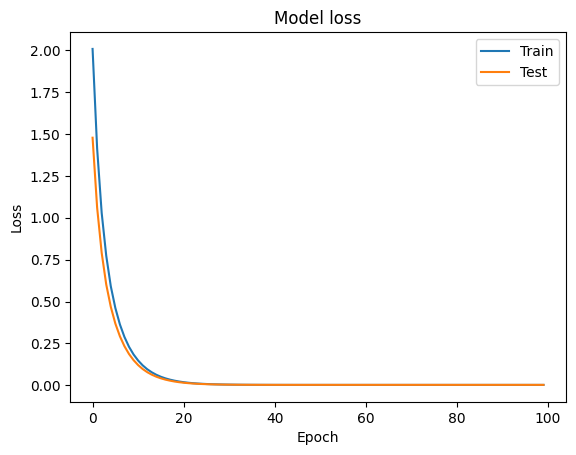

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

#### Prediction

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


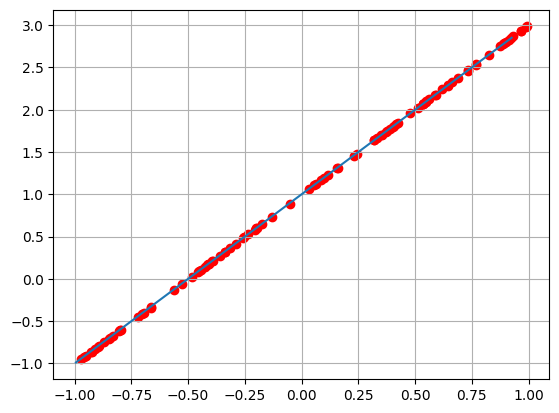

In [8]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Results:

- From the first three plots above, it is evident that a thorough search of hyperparameters is essential to accurately minimize the loss function and achieve the best model performance. The plots illustrate variations in one hyperparameter while keeping the others constant.

- As expected, increasing the number of epochs or the size of the training dataset results in a decrease in the loss. Conversely, when the noise level is high, the loss increases due to the randomness in the data.

- To identify the optimal model, it is more effective to adjust the hyperparameters simultaneously. In fact, for complex models, the loss function often presents multiple local minima, so exploring the parameter space comprehensively is crucial to locating the global minimum.

- Training a new model with $\sigma=0.05$,$N_{epochs}=100$ and $N_{}$


### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

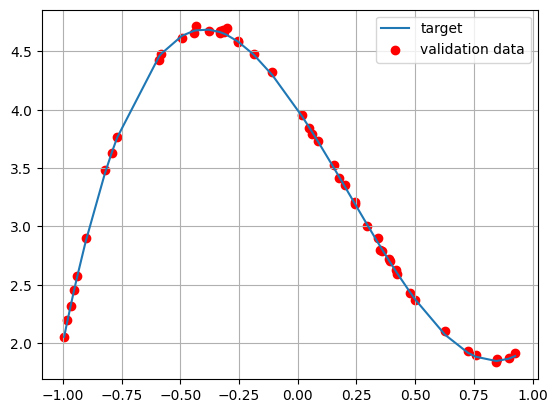

In [13]:
import numpy as np
import matplotlib.pyplot as plt
# target parameters of f(x) = m*x + b
a = 3 
b = -2 
c = -3
d = 4

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = a * x_valid**3 + b*x_valid**2+c*x_valid+d # ideal (target) function

sigma = 0.02 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a * x_train**3 + b*x_train**2+c*x_train+d, sigma) # actual measures from which we want to guess function parameters
y_valid = np.random.normal(a * x_valid**3 + b*x_valid**2+c*x_valid+d, sigma)

# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.layers import Dropout # Add dropout to the model

model = tf.keras.Sequential()
# Add layers to the model
model.add(Dense(128, input_shape=(1,), activation='selu'))
model.add(Dense(64), Activation('selu'))
model.add(Dense(32),Activation('selu'))
model.add(Dense(1), Activation('softmax'))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_155"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_161 (Dense)               │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_162 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_164 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# fit the model using training dataset
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=500, shuffle=True, validation_data=(x_valid, y_valid),verbose=0)
# return weights and biases
model.get_weights()
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Test loss: 0.0025689161848276854
Test accuracy: 0.0025689161848276854


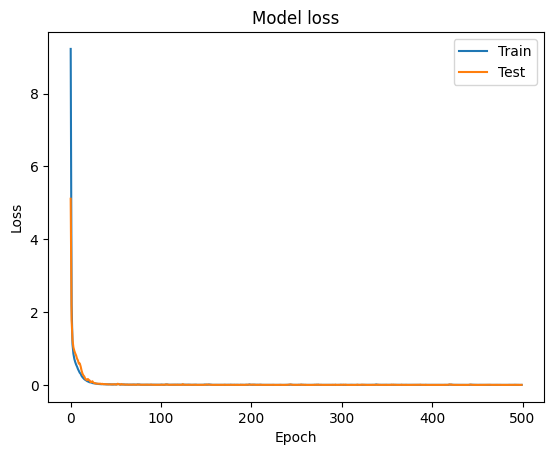

In [16]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


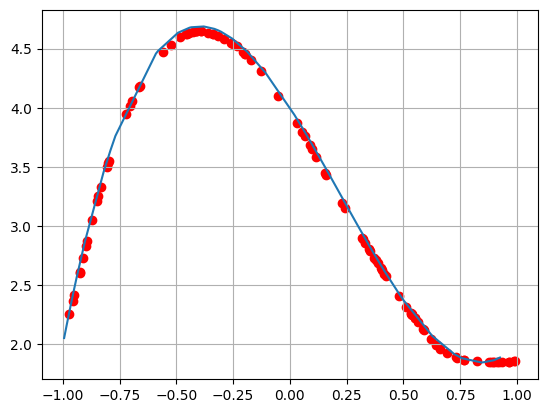

In [17]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


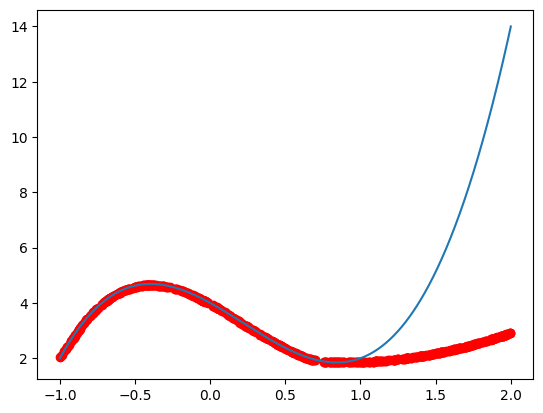

In [18]:
#try to predict data out of the range [-1,1]
x_predicted = np.random.uniform(-1, 2, 500)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
x_valid = np.random.uniform(-1, 2, 5000)
x_valid.sort()
y_target = a * x_valid**3 + b*x_valid**2+c*x_valid+d
plt.plot(x_valid, y_target)

### Results:

- To identify the optimal model for fitting the function $ f(x) = 4 - 3x - 2x^2 + 3x^3 $, various configurations of hyperparameters were tested. The neural network architecture consisted of three layers, with a decreasing number of neurons in deeper layers. This cone-like structure is advantageous for one-dimensional output, gradually reducing the problem's dimensionality throughout the model.

- The optimal configuration found was: $ N_{\text{layers}} = 4 $ and $ N_{\text{neurons}} = 128,64,32,1 $. It is evident that the number of parameters in a neural network does not scale linearly with the complexity of the fit. An excessive number of layers and neurons can lead to overfitting; in fact, I observed that increasing layers and neurons worsens the model's performance due to the abundance of parameters, which reduces its ability to generalize.

- The SELU activation function emerged as the most effective for this problem. This is likely due to the limitations of the ReLU activation, which has no slope for negative values, and the sigmoid activation, which has a very small slope and may not effectively separate the data points. In the last layer a *softmax* is a good choice becaouse of the smoothness.

- To enhance regularization, a Dropout layer was incorporated between layers with a higher number of neurons and connections. This technique randomly deactivates some neurons during the training phase, ensuring that all neurons contribute to the learning process. By introducing randomness in neuron activation, the model learns more diverse representations and distributes knowledge across the entire network. This approach reduces the risk of overfitting to the training data and improves generalization to unseen data, but in this case was not usefull so i decided to remove every dropout layer.

- The Adam optimizer was found to be the most effective. It consistently outperformed SGD and Adagrad, likely due to its adaptive learning rate and momentum estimation, which facilitate the convergence towards the global minimum.

- As shown in the last plot, the model, which fits the curve very well within the trained domain, performs poorly in the untrained regions of the domain. This is because the algorithm cannot infer the underlying function's behavior beyond the data it was trained on. As a result, predictions outside the trained domain are inaccurate, even though an upward trend might be expected.



### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

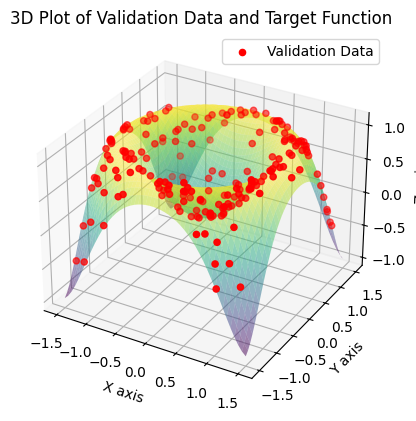

In [10]:
# target parameters of f(x) = m*x + b
a = 3 
b = -2 
c = -3
d = 4

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate training inputs
np.random.seed(1)
x_train = np.random.uniform(-3/2, 3/2, 500)
y_train = np.random.uniform(-3/2, 3/2, 500)
inputs = np.column_stack((x_train, y_train))

x_valid = np.random.uniform(-3/2, 3/2, 200)
y_valid = np.random.uniform(-3/2, 3/2, 200)
inputs_valid = np.column_stack((x_valid, y_valid))
#x_valid.sort()
#y_valid.sort()
# Ideal (target) function
z_target = np.sin(x_valid**2 + y_valid**2)

# Add noise to the target function for training data
sigma = 0.02 # Noise standard deviation
z_train = np.random.normal(np.sin(x_train**2 + y_train**2), sigma) 
z_valid = np.random.normal(np.sin(x_valid**2 + y_valid**2), sigma)

# Plot validation data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_valid, y_valid, z_valid, color='r', label='Validation Data')

# Create a grid for the surface plot
x_grid, y_grid = np.meshgrid(np.linspace(-3/2, 3/2, 50), np.linspace(-3/2, 3/2, 50))
z_grid = np.sin(x_grid**2 + y_grid**2)  # Calculate z values for the grid

# Plot the surface
ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', alpha=0.5)

# Customize plot
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Plot of Validation Data and Target Function')
plt.legend()
plt.show()


In [ ]:
### FIND BEST HIPERPARAMETERS WITH HYPEROPT
'''
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

# 1. Definizione dei dati (inputs e target)
np.random.seed(1)
x_train = np.random.uniform(-3/2, 3/2, 500)
y_train = np.random.uniform(-3/2, 3/2, 500)
inputs = np.column_stack((x_train, y_train))

x_valid = np.random.uniform(-3/2, 3/2, 200)
y_valid = np.random.uniform(-3/2, 3/2, 200)
inputs_valid = np.column_stack((x_valid, y_valid))

# Ideale (target) funzione con rumore
sigma = 0.02  # Deviazione standard del rumore
z_train = np.random.normal(np.sin(x_train**2 + y_train**2), sigma)
z_valid = np.random.normal(np.sin(x_valid**2 + y_valid**2), sigma)

# 2. Definizione dello spazio degli iperparametri
space = {
    'num_layers': hp.choice('num_layers', [3, 4,5]),
    'num_units': hp.choice('num_units', [128, 256,512])
    #'dropout_rate': hp.choice('dropout_rate', [0.1,0.2,0.3,0.4])
}

# 3. Funzione per creare il modello
def create_model(params):
    model = Sequential()
    # Aggiungi il primo layer
    model.add(Dense(params['num_units'], input_shape=(2,), activation='selu'))
    
    # Aggiungi i layer successivi in base al numero di layer scelto
    for i in range(params['num_layers'] - 1):
        num_units=int(params['num_units']/(i+1))
        model.add(Dense(num_units, activation='selu'))
        #model.add(Dropout(params['dropout_rate']))
    
    model.add(Dense(1, activation='selu'))
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

# 4. Funzione obiettivo per Hyperopt
def objective(params):
    model = create_model(params)
    model.fit(x=inputs, y=z_train, batch_size=32, epochs=1000, shuffle=True, validation_data=(inputs_valid, z_valid), verbose=0)
    loss = model.evaluate(inputs_valid, z_valid, batch_size=32, verbose=0)
    return {'loss': loss[0], 'status': STATUS_OK}

# 5. Esecuzione dell'ottimizzazione
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

print("Best hyperparameters:", best)

# OUTPUT:
#100%|██████████| 50/50 [2:05:59<00:00, 151.20s/trial, best loss: 0.0008981894934549928]
#Best hyperparameters: {'num_layers': 1, 'num_units': 1}
'''

2024-10-31 07:59:45.663512: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-31 07:59:45.988012: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-31 07:59:46.124892: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-31 07:59:47.012735: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-31 07:59:50.214420: W tensorflow/compiler/tf2

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

/home/scaio/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



100%|██████████| 50/50 [2:05:59<00:00, 151.20s/trial, best loss: 0.0008981894934549928]
Best hyperparameters: {'num_layers': 1, 'num_units': 1}


In [8]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.layers import Dropout # Add dropout to the model

model = tf.keras.Sequential()
# Add layers to the model
model.add(Dense(256, input_shape=(2,), activation='selu'))
model.add(Dense(128, activation='selu'))
model.add(Dense(85, activation='selu'))
model.add(Dense(64, activation='selu'))
model.add(Dense(1, activation='selu'))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
# fit the model using training dataset
history = model.fit(x=inputs, y=z_train, batch_size=32, epochs=1000, shuffle=True, validation_data=(inputs_valid, z_valid),verbose=0)
# return weights and biases
model.get_weights()
# evaluate model
score = model.evaluate(inputs_valid, z_valid, batch_size=32, verbose=0)
# print performance
print()
print('Test loss:', score[0])


Test loss: 0.001402467954903841


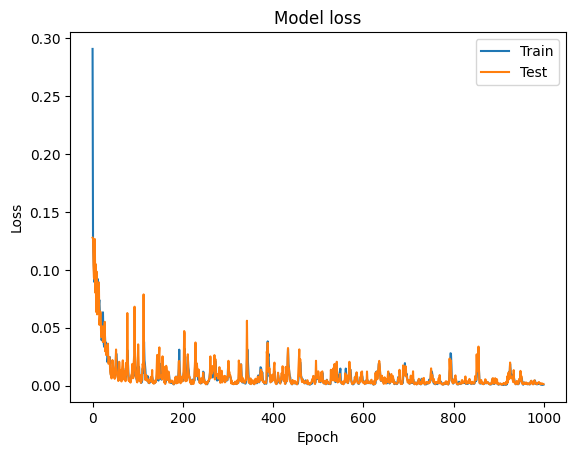

In [11]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


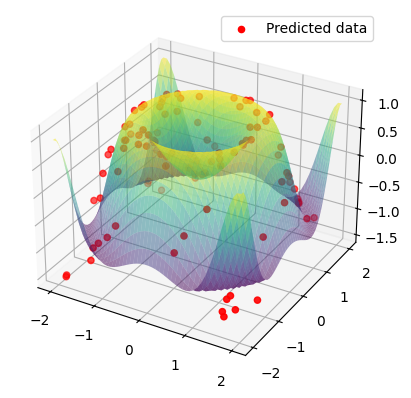

In [14]:
x_predicted = np.random.uniform(-2, 2, 100)
y_predicted = np.random.uniform(-2, 2, 100)
inputs_predicted = np.column_stack((x_predicted, y_predicted))
z_predicted = model.predict(inputs_predicted)
# Plot validation data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_predicted, y_predicted, z_predicted, color='r', label='Predicted data')
# Create a grid for the surface plot
x_grid, y_grid = np.meshgrid(np.linspace(-2, 2, 50), np.linspace(-2, 2, 50))
z_grid = np.sin(x_grid**2 + y_grid**2)  # Calculate z values for the grid

# Plot the surface
ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', alpha=0.5)
plt.legend()
plt.show()

### Results:
- In this code I have used hyperopt for the optimization of the hyperparameters as shown above. I started from the cone-like structure of the exercise **11.2**, but I have raised the number of layers and neurons because of the complexity of the problem increase. with $N_{layers}=4$, $N_{neurons}=256$, $batch\_ size=32$, $N_{epochs}=1000$, $activation\_ function=selu$. I found the best model with a $loss\_ funtion=0.0014$.
- As we can see the model fit well in the training domain but, as in the exercise before, doesn't fit well for different x.